In [72]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display 


# Pretty display for notebooks
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

dataset = pd.read_csv("datasets/dataset_clean.csv.gz", compression='gzip')
dataset['RIESGO_VIDA'] = np.where(dataset['RIESGO_VIDA'] == 'si', 1,0)
dataset = dataset.drop(['Unnamed: 0'], axis = 1)
display(dataset.head(n = 5))

labels_raw = dataset[['RIESGO_VIDA']]
features_raw = dataset.drop(['RIESGO_VIDA'], axis = 1)

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_DPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,bogota d.c.,bogotá,juridica,escrito,pqr,cerrado,peticion directa,reclamo,0,trim i
1,nariño,de 0 a 5 años,ninguno,hombre,no aplica,puerres,otro,no aplica,subsidiado,natural,...,nariño,puerres,natural,telefonico,pqr,cerrado,0,reclamo,0,trim i
2,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,valle,cali,natural,telefonico,pqr,cerrado,0,reclamo,0,trim i
3,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,huila,neiva,natural,personalizado,pqr,cerrado,0,reclamo,0,trim i
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,risaralda,dosquebradas,natural,personalizado,pqr,pendiente (avance),0,reclamo,1,trim i


# Only Health related features

Hypothesis I: The severity of any illness is independ of any demographic feature: i.e: Cancer is bad regardless you are rich or poor. To test this hypothesis we keep only health related features.

In [82]:
dfHealthFeatures = features_raw[[
    'COD_MACROMOT', 
    'MACROMOTIVO', 
    'COD_MOTGEN', 
    'MOTIVO_GENERAL', 
    'COD_MOTESP', 
    'MOTIVO_ESPECIFICO', 
    'PATOLOGIA_1', 
    'PATOLOGIA_TIPO', 
    'CIE_10']]

display(dfHealthFeatures.head(n = 2))


,COD_MACROMOT,MACROMOTIVO,COD_MOTGEN,MOTIVO_GENERAL,COD_MOTESP,MOTIVO_ESPECIFICO,PATOLOGIA_1,PATOLOGIA_TIPO,CIE_10
0,1,restriccion en el acceso a los servicios de salud,101,restriccion en el acceso por falta de oportunidad para la atencion,10115,falta de oportunidad para la prestacion de servicios de laboratorio clinico y anatomo-patologia,problemas relacionados con facilidades de atencion medica u otros servicios de salud,problemas relacionados con facilidades de atencion medica u otros servicios de salud,otra atención médica
1,1,restriccion en el acceso a los servicios de salud,101,restriccion en el acceso por falta de oportunidad para la atencion,10109,falta de oportunidad en la asignacion de citas de consulta medica especializada de otras especialidades medicas,problemas relacionados con facilidades de atencion medica u otros servicios de salud,problemas relacionados con facilidades de atencion medica u otros servicios de salud,0


## Redundant and shared features

These features represent the same data, so we can keep only the codes and loose the descripion.

* COD_MACROMOT, MACROMOTIVO
* COD_MOTGEN, MOTIVO_GENERAL
* COD_MOTESP, MOTIVO_ESPECIFICO

In [99]:
dfHealthFeatures = dfHealthFeatures.drop(['MACROMOTIVO', 'MOTIVO_GENERAL', 'MOTIVO_ESPECIFICO'], axis = 1)
dfHealthFeatures = dfHealthFeatures.astype(str)
display(dfHealthFeatures.head(n = 5))


,COD_MACROMOT,COD_MOTGEN,COD_MOTESP,PATOLOGIA_1,PATOLOGIA_TIPO,CIE_10
0,1,101,10115,problemas relacionados con facilidades de atencion medica u otros servicios de salud,problemas relacionados con facilidades de atencion medica u otros servicios de salud,otra atención médica
1,1,101,10109,problemas relacionados con facilidades de atencion medica u otros servicios de salud,problemas relacionados con facilidades de atencion medica u otros servicios de salud,0
2,1,103,10314,problemas relacionados con facilidades de atencion medica u otros servicios de salud,problemas relacionados con facilidades de atencion medica u otros servicios de salud,"asma, no especificada"
3,1,106,10613,problemas relacionados con facilidades de atencion medica u otros servicios de salud,problemas relacionados con facilidades de atencion medica u otros servicios de salud,agentes virales como causa de enfermedades clasificadas en otros capítulos
4,1,101,10119,enfermedaes neurologicas,epilepsia,epilepsia y sindromes epilepticos idiopaticos generalizados


Features COD_MACROMOT, COD_MOTGEN, COD_MOTESP are codependent feature as represent linked subcategories (COD_MACROMOT -> COD_MOTGEN -> COD_MOTESP), same for PATOLOGIA_1 and PATOLOGIA_TIPO, so we can merge this features.


In [100]:
#dfHealthFeatures['MOTIVO'] = dfHealthFeatures['COD_MACROMOT'] + dfHealthFeatures['COD_MOTGEN'] + dfHealthFeatures['COD_MOTESP']
#dfHealthFeatures['PATOLOGIA'] = dfHealthFeatures['PATOLOGIA_1'] + dfHealthFeatures['PATOLOGIA_TIPO']

#dfHealthFeatures = dfHealthFeatures.drop(['COD_MACROMOT', 'COD_MOTGEN', 'COD_MOTESP', 'PATOLOGIA_1', 'PATOLOGIA_TIPO'], axis = 1)

#display(dfHealthFeatures.head(n = 5))




# Data Exploration

## Features Class Distribution

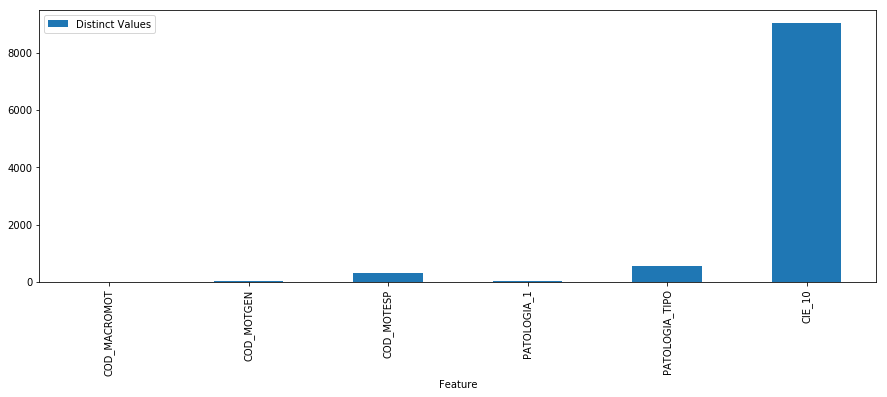

In [101]:

def getFeaturesDistribution(features):
    dfColumns = pd.DataFrame(columns=['Feature','Distinct Values'])
    for colName in features.columns.values:
        dfColumns = dfColumns.append({'Feature': colName, 'Distinct Values': features[colName].unique().size}, ignore_index=True)
    return dfColumns.infer_objects()

def showFeaturesDistribution(dfColumns):
    dfFeatures = dfColumns.copy(deep=True)
    dfFeatures.set_index("Feature",drop=True,inplace=True)
    dfFeatures.plot( kind='bar', figsize = (15,5))
dfColumns = getFeaturesDistribution(dfHealthFeatures)
showFeaturesDistribution(dfColumns)


In [102]:
from __future__ import division
# TODO: Total number of records
n_records = dataset['RIESGO_VIDA'].count()

# TODO: Number of records where individual's life is at risk
life_risk = dataset[dataset["RIESGO_VIDA"] == 1]
n_life_risk = life_risk['RIESGO_VIDA'].count()

# TODO: Number of records where individual's life is not at risk
no_life_risk =  dataset[dataset["RIESGO_VIDA"] == 0]
n_no_life_risk = no_life_risk['RIESGO_VIDA'].count()

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_life_risk/n_records)*100

# Print the results
print "Total number of records: {:,}".format(n_records)
print "Individuals with life at risk: {:,}".format(n_life_risk)
print "Individuals with life not at risk: {:,}".format(n_no_life_risk)
print "Percentage of individuals with life at risk: {:.2f}%".format(greater_percent)

Total number of records: 2,130,783
Individuals with life at risk: 288,811
Individuals with life not at risk: 1,841,972
Percentage of individuals with life at risk: 13.55%


## Encoding dataset

All features in the dataset are categorical. Some of them have too many classes to be one hot encoded. Mean encoding transformation will be perform on the dataset to encode features instead hot encoding it.

In [104]:
from category_encoders import *
import time


start_time = time.time()   
enc = TargetEncoder(cols= dfHealthFeatures.columns.values.tolist(), return_df = True).fit(dfHealthFeatures, labels_raw)
dataset_encoded = enc.transform(dfHealthFeatures)
print("--- %s seconds ---" % (time.time() - start_time))

display(dataset_encoded.head(n = 5))  


--- 1246.56012297 seconds ---


,COD_MACROMOT,COD_MOTGEN,COD_MOTESP,PATOLOGIA_1,PATOLOGIA_TIPO,CIE_10
0,0.264236,0.203051,0.255345,0.151759,0.151759,0.061950
1,0.264236,0.203051,0.156412,0.151759,0.151759,0.090751
2,0.264236,0.449348,0.230204,0.151759,0.151759,0.384615
3,0.264236,0.121258,0.104876,0.151759,0.151759,0.016157
4,0.264236,0.203051,0.285007,0.404018,0.404018,0.795501


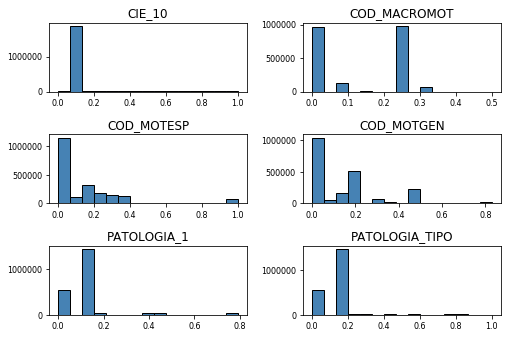

In [105]:

dataset_encoded.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

In [106]:

# Log-transform the skewed features
features_log_transformed = dataset_encoded.apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
display(features_log_transformed.head(n = 2))
#distribution(features_log_transformed, transformed = True)

,COD_MACROMOT,COD_MOTGEN,COD_MOTESP,PATOLOGIA_1,PATOLOGIA_TIPO,CIE_10
0,0.234468,0.184861,0.227410,0.141291,0.141291,0.060107
1,0.234468,0.184861,0.145322,0.141291,0.141291,0.086867


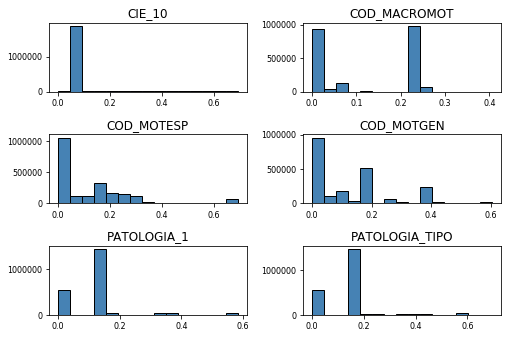

In [107]:

features_log_transformed.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

In [108]:

# Normalize features
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[features_log_transformed.columns.values.tolist()] = scaler.fit_transform(features_log_transformed[features_log_transformed.columns.values.tolist()])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,COD_MACROMOT,COD_MOTGEN,COD_MOTESP,PATOLOGIA_1,PATOLOGIA_TIPO,CIE_10
0,0.579116,0.306415,0.328084,0.242444,0.203936,0.086716
1,0.579116,0.306415,0.209656,0.242444,0.203936,0.125322
2,0.579116,0.615138,0.298898,0.242444,0.203936,0.469485
3,0.579116,0.189709,0.143884,0.242444,0.203936,0.023123
4,0.579116,0.306415,0.361776,0.582582,0.489828,0.844386


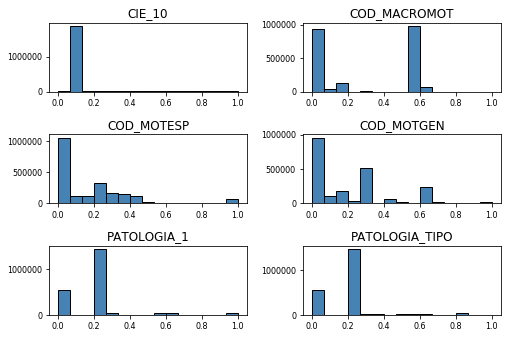

In [109]:
features_log_minmax_transform.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

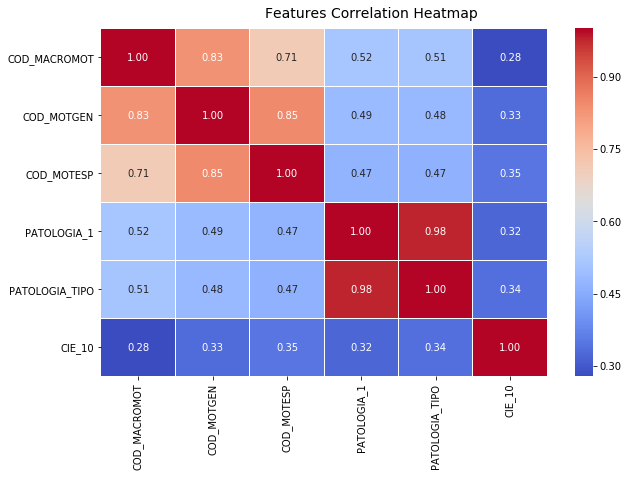

In [110]:

dfEncodedDataset = features_log_minmax_transform
# Correlation Matrix Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 6))
corr = dfEncodedDataset.corr()
hm = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Features Correlation Heatmap', fontsize=14)

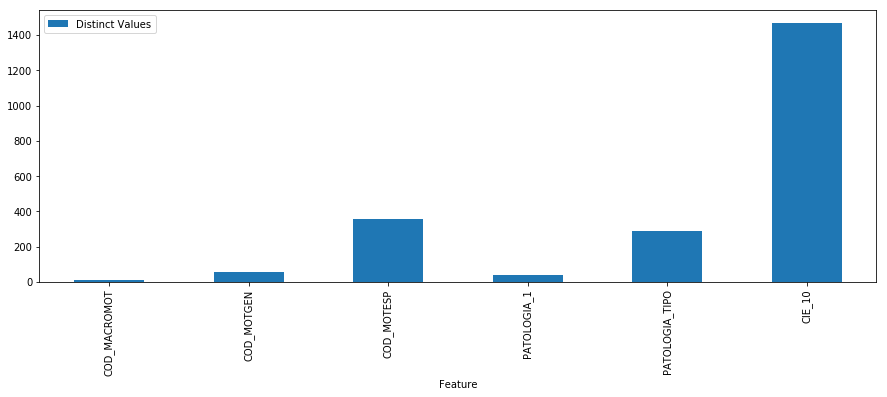

In [112]:

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import QuantileTransformer

# Initialize a scaler, then apply it to the features
scaler = QuantileTransformer() # default=(0, 1)


features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[features_log_transformed.columns.values.tolist()] = scaler.fit_transform(features_log_transformed[features_log_transformed.columns.values.tolist()])

#distribution(features_log_minmax_transform, transformed = True)
# Show an example of a record with scaling applied
dfLogColumns = getFeaturesDistribution(features_log_minmax_transform)
showFeaturesDistribution(dfLogColumns)

# Store Dataset

In [113]:
features_log_minmax_transform['RIESGO_VIDA'] = dataset['RIESGO_VIDA']
features_log_minmax_transform.to_csv("datasets/dataset_health_features.csv.gz", encoding='utf-8', compression = 'gzip')

# Resampling

Target classes are highly unbalanced

0    1841972
1    288811 
Name: RIESGO_VIDA, dtype: int64


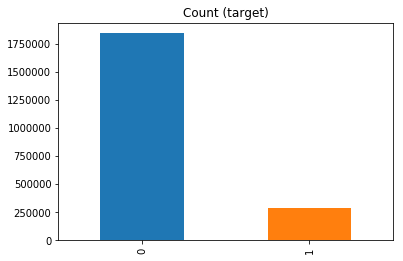

In [ ]:
target_count = dataset['RIESGO_VIDA'].value_counts()
print(target_count)
target_count.plot(kind='bar', title='Count (target)');

In [ ]:
from imblearn.under_sampling import AllKNN

rus = AllKNN(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(features_log_minmax_transform, dataset['RIESGO_VIDA'])

print('Removed indexes:', id_rus)


## Storing removed records for future model validation

In [ ]:
X_rus = pd.DataFrame(np.array(X_rus), columns=features_log_minmax_transform.columns.values.tolist())
y_rus = pd.DataFrame(np.array(y_rus), columns=['RIESGO_VIDA'])


dataset_rus = X_rus
dataset_rus['RIESGO_VIDA'] = y_rus

dataset_rus = pd.concat([features_log_minmax_transform,dataset_rus]).drop_duplicates(keep=False)

display(dataset_rus.head(n = 3))

dataset_rus.to_csv("datasets/dataset_under_sampled_validation.csv.gz", encoding='utf-8', compression = 'gzip')

In [ ]:
target_count_rus = y['RIESGO_VIDA'].value_counts()
print(target_count_rus)
target_count_rus.plot(kind='bar', title='Count (target)');

In [ ]:
X_rus['RIESGO_VIDA'] = y_rus['RIESGO_VIDA']
X_rus.to_csv("datasets/dataset_under_sampled.csv.gz", encoding='utf-8', compression = 'gzip')

## Over Sampling

In [12]:
# Split the dataset to leave a separate dataset to verify the Over Sampled dataset is not overfitting
# Import train_test_split
from sklearn.model_selection import train_test_split

XOS_set, XOS_validation, yOS_set, yOS_validation = train_test_split(features_log_minmax_transform, 
                                                    dataset['RIESGO_VIDA'], 
                                                    test_size = 0.10, 
                                                    random_state = 10)

print "Training set has {} samples.".format(XOS_set.shape[0])
print "Validation set has {} samples.".format(XOS_validation.shape[0])


from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = 'not majority')
X_ros, y_ros = ros.fit_sample(XOS_set, yOS_set)

print(X_ros.shape[0] - XOS_set.shape[0], 'new random picked points')


Training set has 1917704 samples.
Validation set has 213079 samples.
(1397888, 'new random picked points')


In [13]:
X_ros = pd.DataFrame(np.array(X_ros), columns=features_log_minmax_transform.columns.values.tolist())
y_ros = pd.DataFrame(np.array(y_ros), columns=['RIESGO_VIDA'])

1    1657796
0    1657796
Name: RIESGO_VIDA, dtype: int64


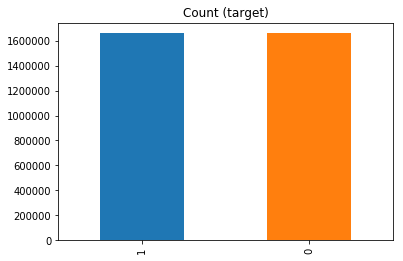

In [14]:
target_count_ros = y_ros['RIESGO_VIDA'].value_counts()
print(target_count_ros)
target_count_ros.plot(kind='bar', title='Count (target)');

In [26]:
X_ros['RIESGO_VIDA'] = y_ros[['RIESGO_VIDA']]
X_ros.to_csv("datasets/dataset_over_sampled.csv.gz", encoding='utf-8', compression = 'gzip')

XOS_validation['RIESGO_VIDA'] = pd.DataFrame(yOS_validation, columns = ['RIESGO_VIDA'])
XOS_validation.to_csv("datasets/dataset_over_sampled_validation.csv.gz", encoding='utf-8', compression = 'gzip')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
